# The Disparity of Internet Offers in the Northeast
Julia Geller | Abby Carr | Yash Jayaprakash

#### Before you Read:
This report is dependent on public access to the figures and data files in the corresponding [Github repository](https://themarkup.org/still-loading/2022/10/19/dollars-to-megabits-you-may-be-paying-400-times-as-much-as-your-neighbor-for-internet-service).

## Executive Summary

Out of the three Internet Service Providers (ISPs) studied- Xfinity, Viasat, and HughesNet- we can determine each kept a single base price and speed when offering internet services in the Boston area. [The first comparison](#comparisons) figure highlights the cheapest or base plan price each company provided in the Boston area and the second figure shows the corresponding download speed. Tier-flattening, or providing worse speeds to disadvantaged communities at the same base price, is not found in Boston under these providers. The study follows the work of [the Markup study on ISP speeds in the US](https://themarkup.org/still-loading/2022/10/19/dollars-to-megabits-you-may-be-paying-400-times-as-much-as-your-neighbor-for-internet-service), and our choice to expand to wired and wireless providers did show that the one popular wired service- Xfinity- provided higher speed and price, but is inconclusive on its own.

## Introduction

In this project, we explore the broadband landscape in the Northeast United States, focusing on Xfinity, Viasat, and HughesNet in the Boston area. Inspired by concerns raised in Leon Yin and Aaron Sankin's 2022 study, we investigate the hypothesis of tier-flattening, assessing if ISPs provide varying broadband speeds at the same base price. Our study, covering wired and wireless providers (Xfinity, HughesNet, and Viasat), aims to reveal disparities in service offerings and prices. By examining the impact on residents in lower-income neighborhoods, we aim to address the disproportionate harm caused by unequal access to high-speed internet. The accountability angle centers on the FCC and the 2019 Broadband Transparency and Accountability Act, emphasizing the legal framework for holding ISPs accountable. Through the analysis, we contribute localized insights to the broader conversation on digital equity and advocate for fair and equal broadband access in the Northeast United States.

## Data Description

The data collected included 323,574 addresses in Boston with a random sample of 700 from Open Addresses. Leveraging the US Bureau Census API, we obtained essential geographic data, including postcode, county, block group, and location ID, facilitating a detailed examination of seven census blocks with 100 samples each. Our goal is to merge this data with aggregated 2019 Census Data from the Markup, incorporating information on income, race, and internet access.

To assess the broadband landscape, we employ web scraping to extract information on the cheapest plans offered by Viasat, Hughes, and Xfinity. Key parameters include download speed, package cost, technology type (satellite, wired, etc.), and the fastest plan's upload speed and price. This data will allow us to identify trends and disparities in internet offerings.

Additionally, we enhance our analysis by labeling addresses based on the Census API, retrieving block group numbers, and assessing Redlining Grades. The merging of this census data provides a holistic understanding of the socio-economic and historical context, enabling a nuanced evaluation of broadband access disparities in different neighborhoods.

By combining geographical, demographic, and internet service data, this project aims to uncover patterns of inequality in broadband access, shedding light on the intersection of socio-economic factors and digital disparities in Boston. The findings will contribute to a more comprehensive understanding of the challenges faced by various communities and inform potential strategies for promoting equitable internet access.

## Ethical Considerations

The project raises important ethical considerations, particularly regarding the potential harm inflicted on residents of lower-income neighborhoods who face unequal access to fast wifi at comparable costs. The impact of this disparity on educational and professional opportunities exacerbates the harm, highlighting a disproportionate effect on vulnerable communities.

In terms of accountability, the primary regulatory body is the Federal Communication Commission (FCC), which mandates that broadband companies report data. The Broadband Transparency and Accountability Act of 2019 emphasizes increased transparency, making provider data more accessible to the public and relevant government entities.

Address data, crucial for our analysis, was sourced from a GitHub repository, acknowledging its crowd-sourced nature. However, it's crucial to recognize potential biases and limitations in the data collection process, as addresses may have been obtained through various means.

Furthermore, the utilization of census data introduces considerations related to potential undercounting of non-citizens. While census data provides valuable demographic information, it may not fully capture the diversity of certain populations, influencing the accuracy of our analysis.

The web scraping of ISPs to gather information about internet plans introduces another layer of ethical considerations. This method is subject to the terms of service of the respective websites, and efforts were made to ensure responsible and respectful data collection.

## Method

As this study follows the previous work as closely as possible, expanding the study required that we adapt the old code instead of creating new individual methods. It was important to have a clear comparison of whether or not the results of this smaller project showed similar disparity results, so the project must use the same methods.

Data collection took considerable time and effort and was the main limiting factor. Data collection centered around the address data. After downloading and sampling the addresses of Boston, there were still additional features and data merging that were needed to get data, even outside of the ISP website scraping. It would be most valuable to have a full list of addresses, but since the additional data required scraping, census, and FCC information, this was the limiting factor. The quantity of addresses then multiplies the time and cost of data per entry. For this reason, the project was reduced to include only Boston.

There were numerous counts of data processing for the final results. First, addresses had to be split into a single format to be usable. The OpenAddress data is already in a standard format but needs to be split into relevant address parts. In addition, the census data used was processed extremely for the results. Rather than keeping proportions, the data was split into buckets for use and given text-readable names to indicate the values. There is evidence in this for race, income, and redlining buckets, whereas the racial percentage graph required numerical data.

Our methods did use independent scraping from the original methods. There were previous works that showed scraping all on sites that were not as large in the Northeast or used scraping that has since become difficult to run. There was intensive research into the data requirements of the original study so that the original analysis would be able to be run given the correct data. Data buckets and limits were kept for this study to have the most reasonable results.

These final results will be compared against the baseline graphs generated for cities in the Markup study. Since this project originally hoped to include the entire Northeast, these are the comparisons that ended up being used. On the other hand, the analysis that was planned included an ablations study using binary logistic regression. In this study, a model is created to predict internet pricing. For each of our target variables of race, income, and redlining, that given feature is removed as the model is rerun. Geography, race, income, and redlining are heavily correlated, making it so a given coefficient for a feature isn't going to signify the level of importance. If race has a large impact, and we remove it, the way that the coefficients change is going to give the analysis showing significance.

The decision to keep analysis at numeric values and counts within buckets is best suited due to the exploratory nature of the results. Having a broad and comparison-style analysis allows for a better understanding of where to explore next. If the analysis had followed our proposed regression equation as described above, there would be significance in seeing how this ablation study compared to that of the major United States. This analysis would have given insight into whether or not the Northeast carries more or less tier flattening, and having enough cities means that the analysis would be able to focus on the relation between cities showing or not showing tier flattening.

## Results

### Create variables from Github hosted files

In [1]:
import pandas as pd

fn_xfinity = "https://github.com/abbycarr/investigate_NE_isp/raw/main/data/output/speed_price_xfinity.csv.gz"
fn_hughes = "https://github.com/abbycarr/investigate_NE_isp/raw/main/data/output/speed_price_hughes.csv.gz"
fn_viasat = "https://github.com/abbycarr/investigate_NE_isp/raw/main/data/output/speed_price_viasat.csv.gz"
hughes_df = pd.read_csv(fn_hughes, compression="gzip")
xfinity_df = pd.read_csv(fn_xfinity, compression="gzip")
viasat_df = pd.read_csv(fn_viasat, compression="gzip")

### Download Files to run Analysis

In [ ]:
import requests
import os

config = (
    "https://github.com/abbycarr/investigate_NE_isp/raw/main/analytics_files/config.py"
)
agg = "https://github.com/abbycarr/investigate_NE_isp/raw/main/analytics_files/aggregators.py"
dc = requests.get(config, allow_redirects=True)
da = requests.get(agg, allow_redirects=True)
open("config.py", "x")
open("aggregators.py", "x")
open("config.py", "wb").write(dc.content)
open("aggregators.py", "wb").write(da.content)

In [2]:
from aggregators import (
    race,
    income,
    redlining,
    plot_race,
    speed_breakdown,
    bucket_and_bin,
)

hughes_df = hughes_df[hughes_df.speed_down != 0]
hughes_df = bucket_and_bin(hughes_df)
xfinity_df = xfinity_df[xfinity_df.speed_down != 0]
xfinity_df = bucket_and_bin(xfinity_df)
viasat_df = viasat_df[viasat_df.speed_down != 0]
viasat_df = bucket_and_bin(viasat_df)


### HughesNet

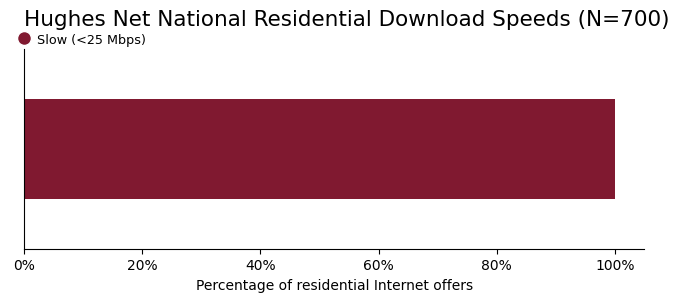

In [3]:
speed_breakdown(hughes_df, "Hughes Net")

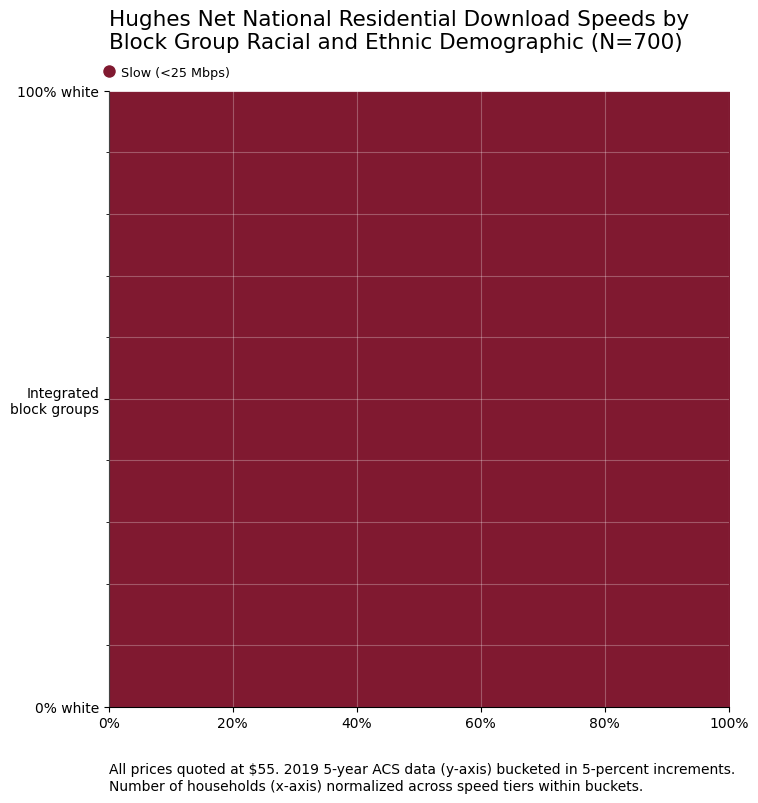

In [4]:
plot_race(hughes_df, "Hughes Net")

/Users/abbycarr/Desktop/CS4973/investigate_NE_isp/notebooks/aggregators.py:153: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("race_quantile")


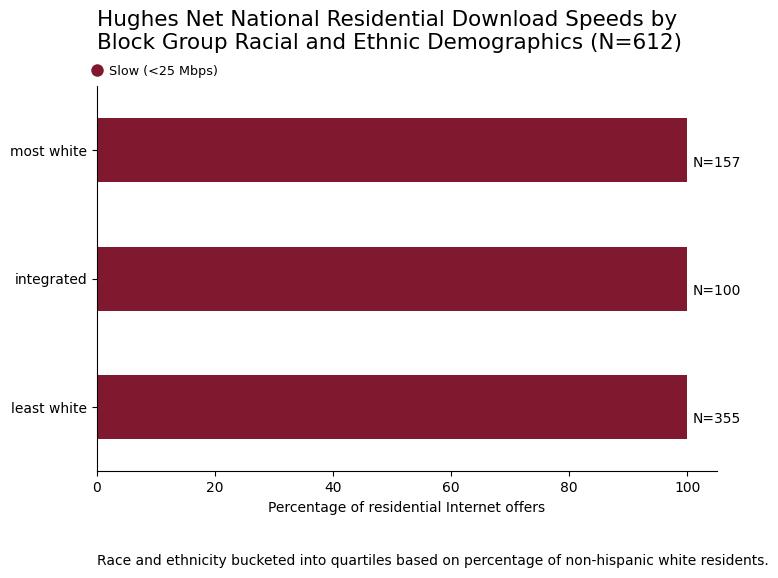

In [5]:
race(hughes_df, "Hughes Net")

/Users/abbycarr/Desktop/CS4973/investigate_NE_isp/notebooks/aggregators.py:238: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("income_level")


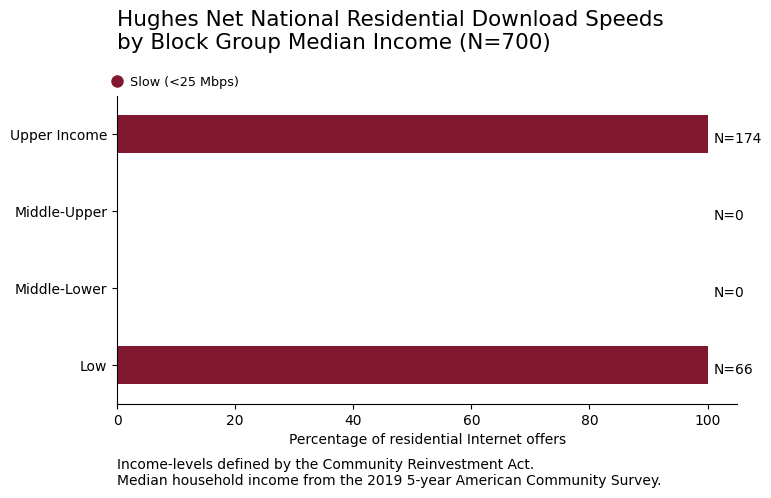

In [6]:
income(hughes_df, "Hughes Net")

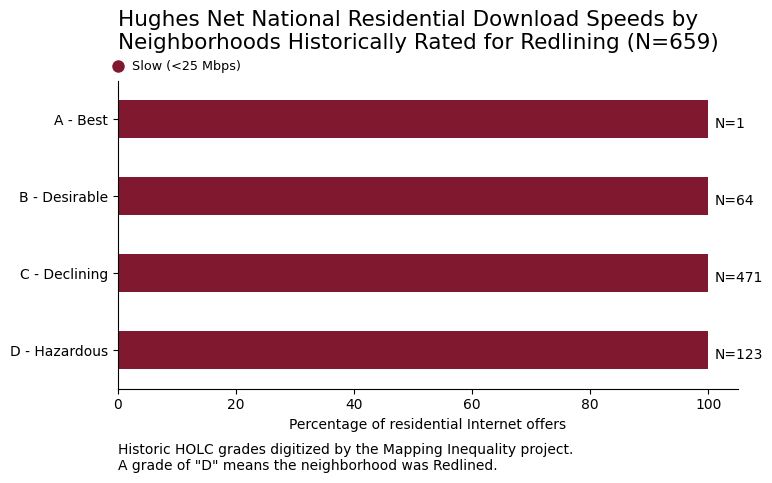

In [7]:
redlining(hughes_df, "Hughes Net")

### Viasat

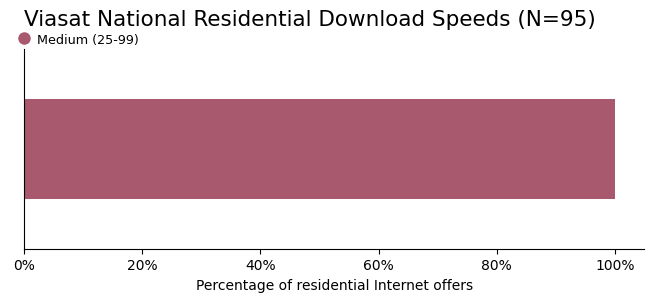

In [12]:
speed_breakdown(viasat_df, "Viasat")

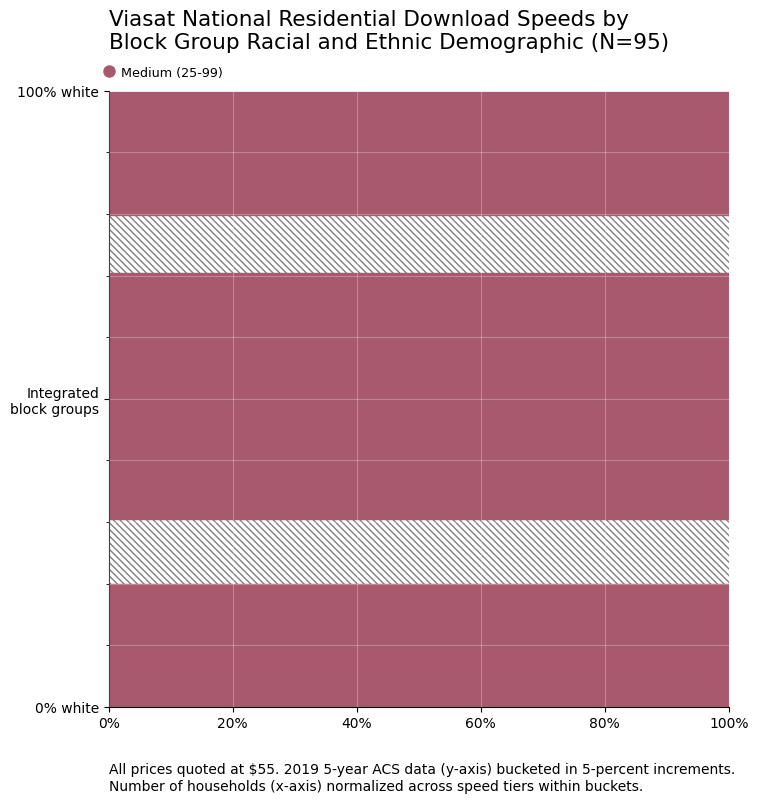

In [13]:
plot_race(viasat_df, "Viasat")

/Users/abbycarr/Desktop/CS4973/investigate_NE_isp/notebooks/aggregators.py:153: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("race_quantile")


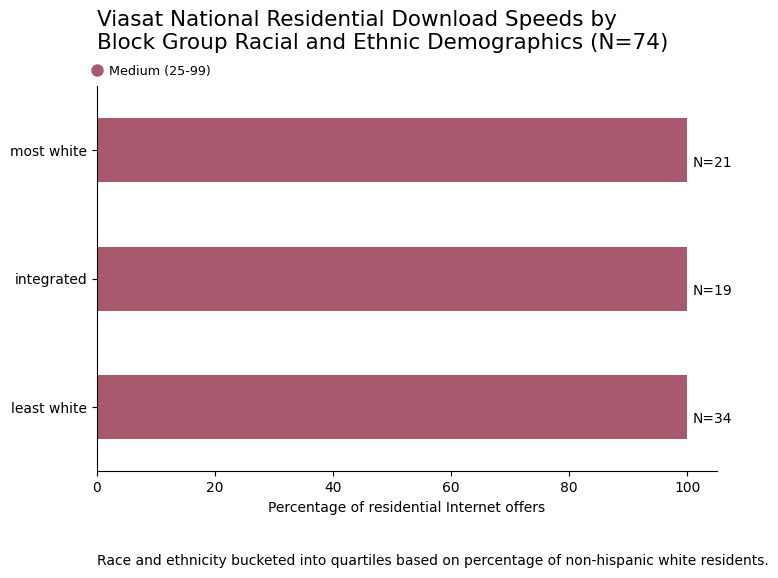

In [14]:
race(viasat_df, "Viasat")

/Users/abbycarr/Desktop/CS4973/investigate_NE_isp/notebooks/aggregators.py:238: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("income_level")


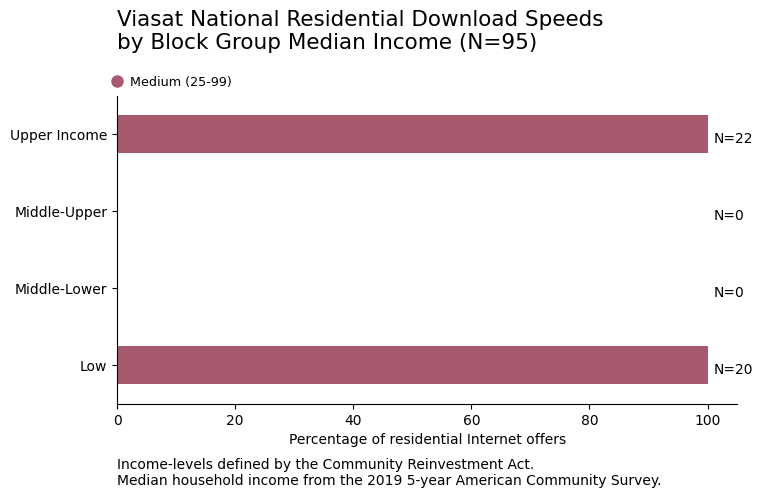

In [15]:
income(viasat_df, "Viasat")

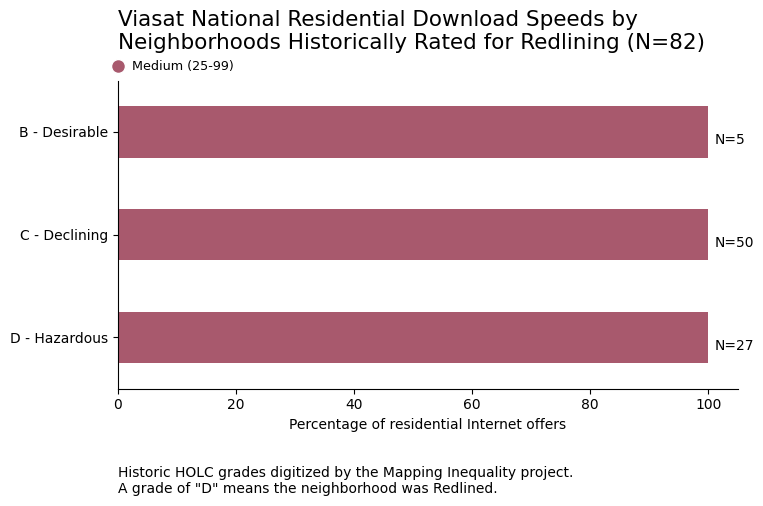

In [16]:
redlining(viasat_df, "Viasat")

### Xfinity

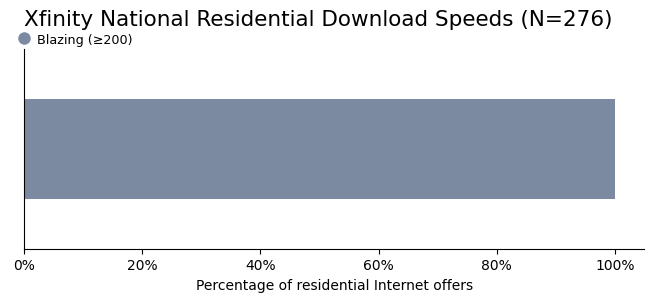

In [17]:
speed_breakdown(xfinity_df, "Xfinity")

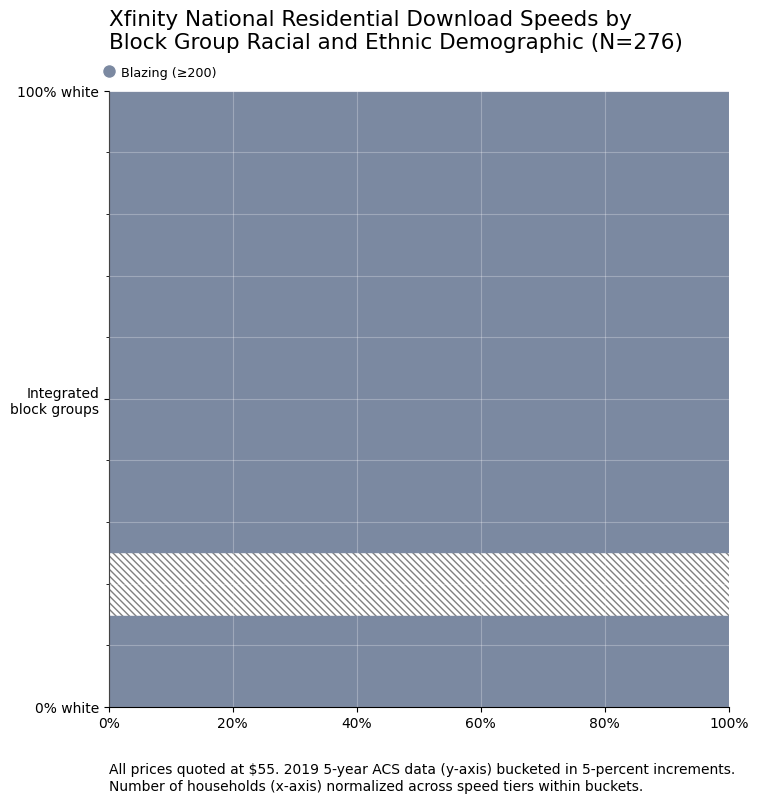

In [18]:
plot_race(xfinity_df, "Xfinity")

/Users/abbycarr/Desktop/CS4973/investigate_NE_isp/notebooks/aggregators.py:153: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("race_quantile")


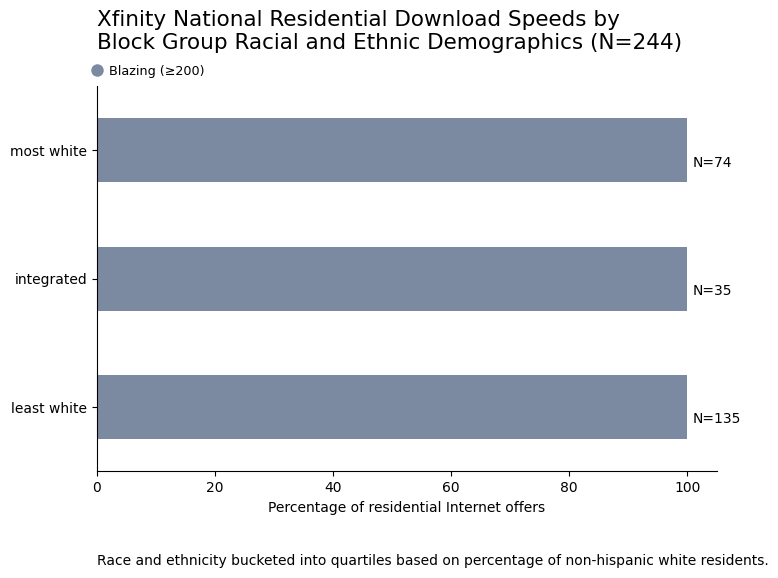

In [19]:
race(xfinity_df, "Xfinity")

/Users/abbycarr/Desktop/CS4973/investigate_NE_isp/notebooks/aggregators.py:238: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("income_level")


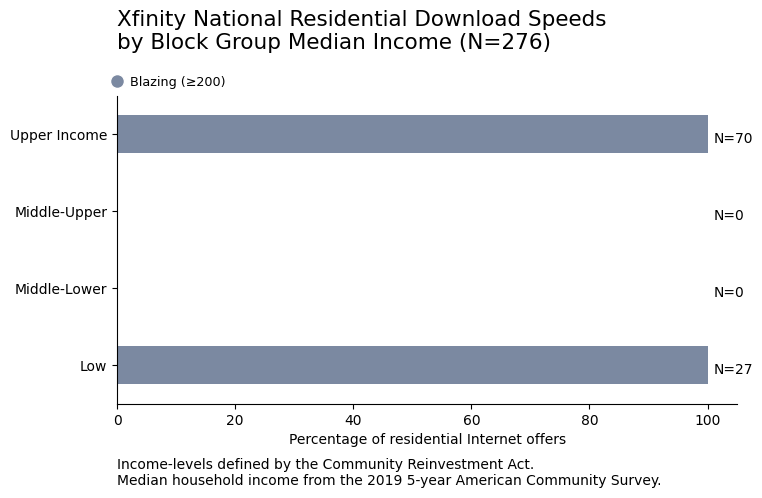

In [20]:
income(xfinity_df, "Xfinity")

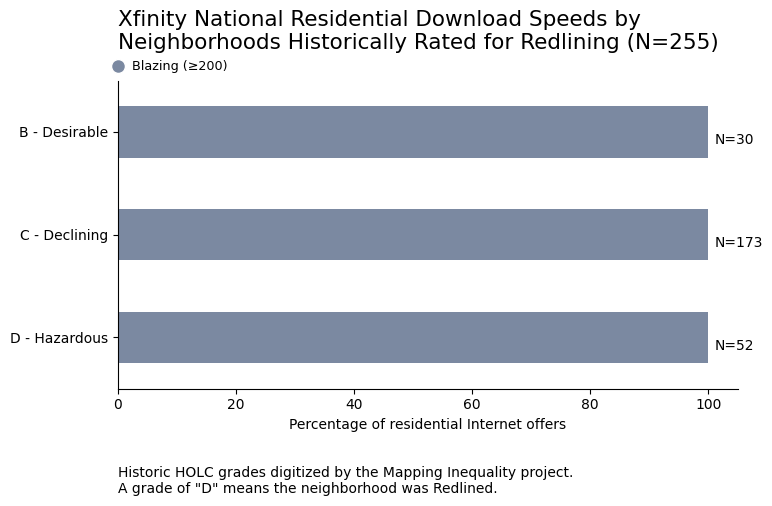

In [21]:
redlining(xfinity_df, "Xfinity")

### Comparisons

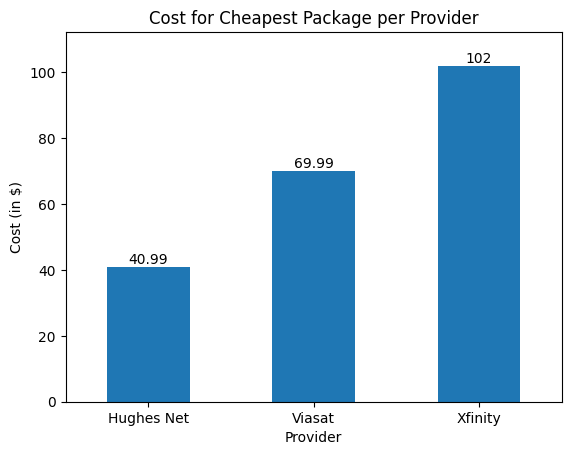

In [22]:
# dataframe using frequencies and x_labels from the OP
df = pd.DataFrame({'Cost': [40.99, 69.99, 102.00]}, index=['Hughes Net', 'Viasat', 'Xfinity'])

# plot
ax = df.plot(kind='bar', title='Cost for Cheapest Package per Provider',
             xlabel='Provider', ylabel='Cost (in $)', legend=False, rot=0)

# annotate
ax.bar_label(ax.containers[0], label_type='edge')

# pad the spacing between the number and the edge of the figure
ax.margins(y=0.1)

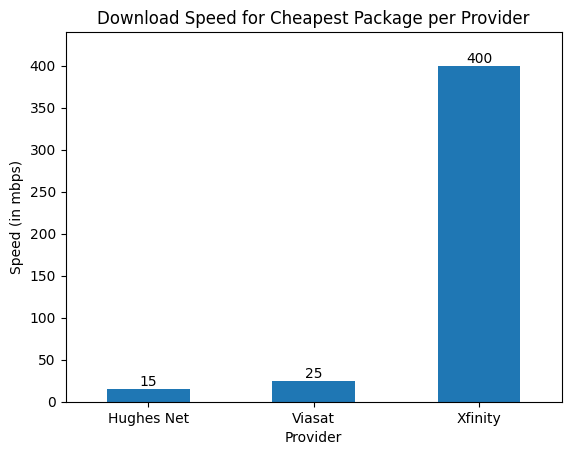

In [23]:
# dataframe using frequencies and x_labels from the OP
df = pd.DataFrame({'Down Speed': [15, 25, 400]}, index=['Hughes Net', 'Viasat', 'Xfinity'])


# plot
ax = df.plot(kind='bar', title='Download Speed for Cheapest Package per Provider',
             xlabel='Provider', ylabel='Speed (in mbps)', legend=False, rot=0)

# annotate
ax.bar_label(ax.containers[0], label_type='edge')

# pad the spacing between the number and the edge of the figure
ax.margins(y=0.1)

## Discussion

Our results are interesting to look at when you take the time to reflect on the previous work of Leon and the Markup Study. Through their results, they found significant evidence of disparity through tier flattening throughout the United States. In a conversation with Leon, it was mentioned that Boston and Northeast cities tended to show little to no signs of tier flattening. We decided to spend our time specializing in the Northeast itself, and further investigate how the internet in the Northeast is shaped. 

Our data of addresses can greatly limit the study. We only work on the addresses from the OpenAddress database which is limited. In addition, we were limited by time, how many addresses we could pull, and by what services were easily scraped.

It's clear to see that each of HugehsNet, Viasat, and Xfinity all have graphs with full bars, indicating that no matter the offer- its distribution was not correlated to the income, racial, or redlining data for addresses. The graphs you will see for each provider begin with the residential download speed. As we will compare later in the discussion, each of the services had a single cheap package and this graph shows the single download speed provided throughout the Boston area, by provider. The categorization of the speed offered was Blazing(>=200 mbs) for Xfinity, Medium (25-99 mbs) for Viasat, and Slow (<25 mbs) for HughesNet. 


If you take a look at the figure comparing the three providers' download speeds, you see the literal amounts are 400, 25, and 15 mbs respectively. Clearly, Xfinity- the one wired option we scraped- is much faster than the two satellite providers in this context. We did not explore this further in our study, but it would be interesting to look at how the gap and coverage of cities in the US may be different between wired and wireless coverage. 

The second comparative graph lists the pricing- $102.00 Xfinity, $69.99 Viasat, $40.99 HughesNet- which follows the same trend as the speeds, although the prices are much less drastically spaced out. The closest comparison with the individual provider graphs may be the one highlighting the counts of upper to low-income communities. As you can see, the individual graphs are colored by the MBS speed (Blazing, Medium, Low)- as such what we can discern lies on the counts per row. The single graphs show only High and Low-Income counts per provider; there is likely a constraint where the areas of interest have been joined on census data where the different Middle-class categories were not found.

Our last graphs are counts of redlining grading and racial demographics, while a graph of percent demographics is fully colored in a way that does not give any additional information. The counts you see, as well as the counts previously discussed, are more informative to the local Boston makeup. There is a trend where higher amounts of most and least white areas are more prevalent than the integrated sections. In addition, redlining is almost exclusively B through D grades and not A in Boston. This is expected if you look at Boston demographics.

## Takeaway

Overall, the important result of the study is that Boston did not show signs of tier flattening. It brought up plenty of interesting next work for the project. 

Our work would not inform any action at this time, but it does prompt further research. We initially decided to work with the Northeast, and the first option would be for us to expand our work. There had been a list of the most populous cities in the Northeast states, including DC, that provided us with the next cities to work with. This will considerably expand the study and should provide evidence as to whether or not disparities exist clearly in the given cities. We are looking for more proof that there is or is not a correlation.

The next takeaway falls within the types of providers we use. It would be interesting to research satellite wifi plans. The use of these satellite plans in the research has raised interest in how satellite wifi plans are priced in the wider United States. It would be interesting to see if there is any price difference (although, upon calling, HughesNet gave one flat-rate price).

Our project did not provide specific results to act on, but the accountability in this topic lies with the ISPs. We hope that this accountability would rely on the ISPs being pressured to change or update their offerings by regulations. 

## Appendix

![data table](https://i.imgur.com/P0DEd8x.png)